In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


In [4]:
train_df = pd.read_csv(r'C:\Users\Nandu\Downloads\archive (1)\sign_mnist_train.csv')
test_df = pd.read_csv(r'C:\Users\Nandu\Downloads\archive (1)\sign_mnist_test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (27455, 785)
Test shape: (7172, 785)


In [5]:
# Separate labels and features
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Normalize pixel values (0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to 28x28 images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels (needed for training model later)
y_train_cat = to_categorical(y_train, num_classes=25)
y_test_cat = to_categorical(y_test, num_classes=25)


In [6]:
# 0-24 mapped to A-Z (excluding J and Z)
label_to_letter = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
    5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K',
    10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P',
    15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U',
    20: 'V', 21: 'W', 22: 'X', 23: 'Y', 24: 'Z'
}


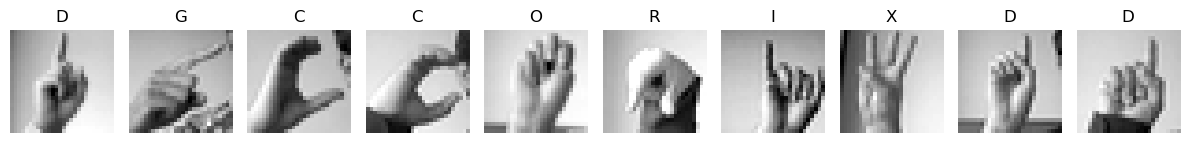

In [7]:
# Show 10 sample training images with labels
plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(label_to_letter[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(25, activation='softmax')  # 25 output classes (A-Z excluding J & Z)
])


C:\Users\Nandu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))



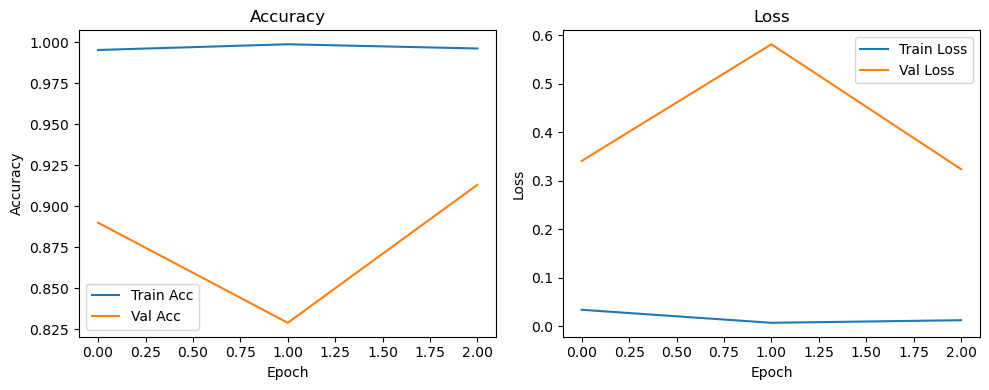

In [17]:
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
import cv2

# Start video capture
cap = cv2.VideoCapture(0)

print("Press 'q' to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Draw a square ROI on the screen
    cv2.rectangle(frame, (100, 100), (300, 300), (255, 0, 0), 2)
    roi = frame[100:300, 100:300]

    # Preprocess ROI to match training input (28x28 grayscale)
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    normalized = resized / 255.0
    reshaped = normalized.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(reshaped)
    predicted_class = np.argmax(prediction)
    letter = label_to_letter[predicted_class]

    # Show prediction
    cv2.putText(frame, f'Prediction: {letter}', (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Sign Language Detector", frame)

    # Break with 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


Press 'q' to quit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms

to close the camera press f

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    # ...
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
